<a href="https://colab.research.google.com/github/pratyaksh12/Multi-Class_Classification/blob/main/Muli_Class_Classification_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [327]:
NUM_CLASSES = 6
NUM_FEATURES = 2
RANDOM_SEED = 42

#create the data
X_blob, y_blob = make_blobs(1000, n_features = NUM_FEATURES,centers = NUM_CLASSES, cluster_std = 0.8)

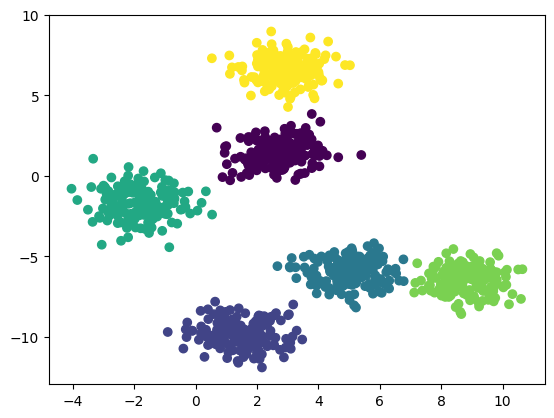

In [328]:
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob )

In [329]:
#Convert data to tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

#split the data into train and testing
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size = 0.2, random_state = 42)

In [330]:
#create devic agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.type(torch.LongTensor).to(device)
y_test = y_test.type(torch.LongTensor).to(device)

In [332]:
#Build a multi calss classification model

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
    return self.linear_stack(x)

model = BlobModel(2, 6)
model.to(device)


BlobModel(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=6, bias=True)
  )
)

In [333]:
(next(model.parameters()).device)

device(type='cpu')

In [334]:
##Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [335]:
logit = model(X_train)

##Getting prediction probabilities for multi class model



In [336]:
#training and testing loop for multiclass predictions

epochs = 1000

for epoch in range(epochs):
  model.train()

  #forward pass
  y_logits = model(X_train)

  #Calculate the loss
  loss = loss_fn(y_logits, y_train)

  #Zero grad
  optimizer.zero_grad()

  #Backward pass
  loss.backward()

  #Gradient descent
  optimizer.step()

  ##Training loop

  model.eval()
  with torch.inference_mode():
    y_test_logits = model(X_test)
    loss_test = loss_fn(y_test_logits, y_test)

    if epoch % 100 == 0:
      print(f"Epoch = {epoch}, Loss = {loss}, Test_Loss = {loss_test}")



Epoch = 0, Loss = 1.8247971534729004, Test_Loss = 1.7526170015335083
Epoch = 100, Loss = 0.3072163462638855, Test_Loss = 0.34063732624053955
Epoch = 200, Loss = 0.1522950977087021, Test_Loss = 0.18761080503463745
Epoch = 300, Loss = 0.10792448371648788, Test_Loss = 0.13903623819351196
Epoch = 400, Loss = 0.09118948131799698, Test_Loss = 0.1211954653263092
Epoch = 500, Loss = 0.08208968490362167, Test_Loss = 0.11177520453929901
Epoch = 600, Loss = 0.07447970658540726, Test_Loss = 0.10299471020698547
Epoch = 700, Loss = 0.0695962980389595, Test_Loss = 0.09789960086345673
Epoch = 800, Loss = 0.06492092460393906, Test_Loss = 0.09277085959911346
Epoch = 900, Loss = 0.06093798577785492, Test_Loss = 0.08818060159683228


In [337]:
import requests
from pathlib import Path

if Path('Python_Helper.py').is_file():
  print("already present")
else:
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('Python_Helper.py', 'wb') as f:
    f.write(request.content)

already present


In [338]:
from Python_Helper import plot_decision_boundary

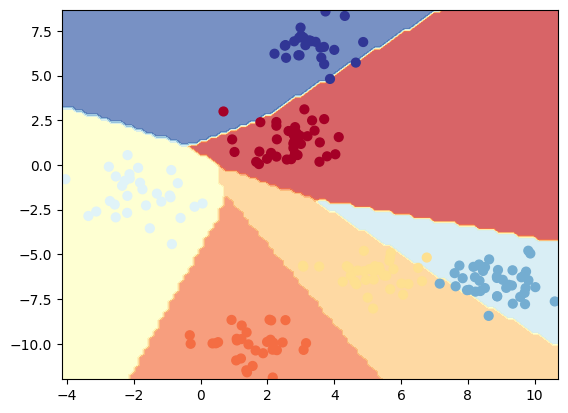

In [339]:
plot_decision_boundary(model, X_test, y_test)

In [340]:
model.eval()
with torch.inference_mode():
  y_pred = model(X_test)

In [341]:
y_pred# convert logits to prediction probability

tensor([[ 11.5732,  -5.3902,  18.1375, -34.3530,  20.2089, -26.4106],
        [ 11.7950,  -6.6271,  15.2038, -31.0921,  18.2616, -22.1780],
        [  7.7674,  -5.7245,   2.5764,  -7.5377,   1.1755,  -3.9964],
        ...,
        [ 14.8651, -19.8833, -11.9009,   0.2543, -19.5007,  22.2749],
        [-23.5510,  28.6943,  18.4598,  19.2881, -14.4747, -29.7747],
        [-21.2252,  26.1408,  17.4626,  16.4692, -12.5201, -27.8831]])

In [342]:
y_prob = torch.softmax(y_pred, dim =  1)

In [343]:
y_prob

tensor([[1.5774e-04, 6.7740e-12, 1.1190e-01, 1.7885e-24, 8.8795e-01, 5.0328e-21],
        [1.4825e-03, 1.4805e-11, 4.4815e-02, 3.5106e-22, 9.5370e-01, 2.6106e-18],
        [9.9310e-01, 1.3726e-06, 5.5283e-03, 2.2393e-07, 1.3619e-03, 7.7278e-06],
        ...,
        [6.0493e-04, 4.9053e-19, 1.4368e-15, 2.7311e-10, 7.1918e-19, 9.9940e-01],
        [2.0422e-23, 9.9988e-01, 3.5903e-05, 8.2200e-05, 1.7859e-19, 4.0475e-26],
        [2.6858e-21, 9.9977e-01, 1.7021e-04, 6.3028e-05, 1.6206e-17, 3.4483e-24]])

In [344]:
y_label = torch.argmax(y_prob, dim = 1)

In [345]:
y_label

tensor([4, 4, 0, 3, 2, 1, 3, 2, 1, 4, 5, 4, 3, 5, 3, 5, 3, 1, 4, 4, 1, 4, 3, 1,
        1, 1, 5, 1, 3, 2, 0, 3, 5, 2, 4, 3, 1, 0, 4, 5, 3, 5, 5, 0, 1, 2, 0, 2,
        2, 3, 2, 3, 4, 2, 0, 4, 5, 0, 5, 3, 0, 5, 5, 0, 1, 0, 4, 4, 5, 0, 2, 1,
        2, 4, 0, 2, 4, 0, 1, 1, 1, 0, 2, 5, 0, 1, 1, 4, 0, 2, 2, 4, 0, 3, 4, 0,
        0, 0, 0, 2, 0, 3, 4, 3, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 3, 4, 4, 1, 3,
        2, 5, 1, 3, 0, 2, 2, 0, 3, 4, 4, 1, 1, 4, 5, 4, 4, 1, 2, 4, 4, 0, 2, 3,
        1, 4, 3, 2, 4, 2, 5, 2, 4, 0, 0, 2, 4, 2, 2, 0, 4, 5, 5, 1, 3, 4, 4, 4,
        0, 5, 5, 3, 0, 4, 5, 0, 3, 3, 0, 4, 4, 0, 4, 3, 3, 0, 2, 1, 0, 3, 2, 2,
        4, 3, 1, 1, 5, 5, 1, 1])

In [346]:
y_test

tensor([4, 4, 0, 3, 4, 1, 3, 2, 1, 4, 5, 4, 3, 5, 3, 5, 3, 1, 4, 4, 1, 4, 3, 1,
        1, 1, 5, 1, 3, 2, 0, 3, 5, 2, 4, 3, 1, 0, 4, 5, 3, 5, 5, 0, 1, 2, 0, 2,
        2, 3, 2, 3, 4, 2, 0, 4, 5, 0, 5, 3, 0, 5, 5, 0, 1, 0, 4, 4, 5, 0, 2, 1,
        2, 4, 0, 2, 4, 0, 1, 1, 1, 0, 2, 5, 0, 1, 1, 4, 0, 2, 2, 4, 0, 3, 2, 5,
        0, 0, 0, 2, 0, 3, 4, 3, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 3, 4, 4, 1, 3,
        2, 5, 1, 3, 0, 2, 2, 0, 3, 4, 4, 1, 1, 4, 5, 4, 4, 1, 2, 4, 4, 0, 2, 3,
        1, 4, 3, 2, 4, 2, 5, 2, 4, 0, 0, 2, 4, 4, 2, 0, 4, 5, 0, 1, 3, 4, 4, 4,
        0, 5, 5, 3, 0, 4, 5, 0, 3, 3, 5, 4, 4, 0, 4, 3, 3, 0, 2, 1, 0, 3, 2, 2,
        4, 3, 1, 1, 5, 5, 1, 1])

## Recap:

Loss used - nn.CrossEntropyLoss()
Optimizer - torch.optim.SGD()

you get `logits` -> `prediction probability` -> `prediction label`

- we use softmax() for converting logit to prediction probability, dont forget to set dim = 1
- we use argmax() to convert prediction probability to prediction label don'e forget to set dim = 1

In [347]:
#lets check the accuracy
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, torch.argmax(torch.softmax(model(X_test), dim = 1), dim = 1))

In [348]:
acc

0.97